<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
df.dtypes

ResponseId               int64
MainBranch                 str
Age                        str
Employment                 str
RemoteWork                 str
                        ...   
JobSatPoints_11        float64
SurveyLength               str
SurveyEase                 str
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [8]:
df.shape

(65437, 114)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [9]:
df.isna().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


In [15]:
print(f"Data shape after cleaning: {df.shape}")

Data shape after cleaning: (65437, 114)


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [16]:
employment_counts = df['Employment'].value_counts()
employment_counts

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [17]:
jobsat_counts = df['JobSat'].value_counts()
jobsat_counts

JobSat
6.935041     36311
8.000000      7509
7.000000      6379
6.000000      3751
9.000000      3626
10.000000     2251
5.000000      1956
3.000000      1165
4.000000      1130
2.000000       772
0.000000       311
1.000000       276
Name: count, dtype: int64

In [18]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)

yearscodepro_counds = df['YearsCodePro'].value_counts()
yearscodepro_counds

YearsCodePro
2.0     17995
3.0      4093
5.0      3526
10.0     3251
4.0      3215
0.5      2856
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0      492
23.0      448
26.0      426
27.0      380
21.0      380
28.0      342
35.0      285
29.0      196
32.0      194
40.0      194
34.0      169
38.0      134
33.0      132
36.0      119
31.0      106
37.0      104
45.0       56
42.0       55
39.0       54
41.0       51
51.0       50
44.0       42
43.0       37
46.0       21
50.0       14
48.0       14
49.0       11
47.0       10
Name: count, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


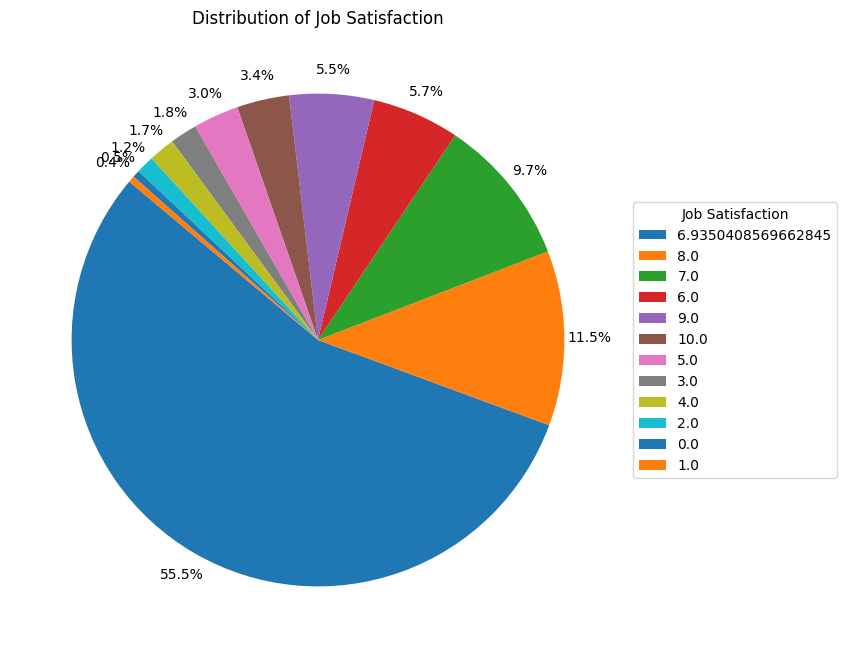

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    jobsat_counts,
    autopct='%1.1f%%',
    pctdistance=1.10,  
    startangle=140
)

ax.legend(
    wedges,
    jobsat_counts.index,
    title="Job Satisfaction",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_aspect('equal')
ax.set_title('Distribution of Job Satisfaction')

plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [20]:
have = (
    df['LanguageHaveWorkedWith']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
)

have_counts = have.value_counts()
have_counts

LanguageHaveWorkedWith
JavaScript                 43184
HTML/CSS                   37508
Python                     30719
SQL                        30682
TypeScript                 28842
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
PHP                        10951
PowerShell                  8328
Go                          8103
Rust                        7559
Kotlin                      5665
Lua                         3728
Dart                        3594
Assembly                    3233
Ruby                        3147
Swift                       2829
R                           2595
Visual Basic (.Net)         2499
MATLAB                      2378
VBA                         2248
Groovy                      2004
Scala                       1547
Perl                        1482
GDScript                    1402
Objective-C                 1283
Elixir              

In [21]:
want = (
    df['LanguageWantToWorkWith']
    .dropna()
    .str.split(';')
    .explode()
    .str.strip()
)

want_counts = want.value_counts()
want_counts

LanguageWantToWorkWith
Python                     34732
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Java                       10668
C                           8275
Kotlin                      7379
PHP                         5745
PowerShell                  4287
Swift                       3877
Dart                        3709
Zig                         3688
Lua                         3322
Assembly                    3007
Elixir                      2895
Ruby                        2774
Haskell                     2221
R                           2177
Scala                       1790
GDScript                    1667
Clojure                     1331
F#                          1272
Julia                       1263
Lisp                

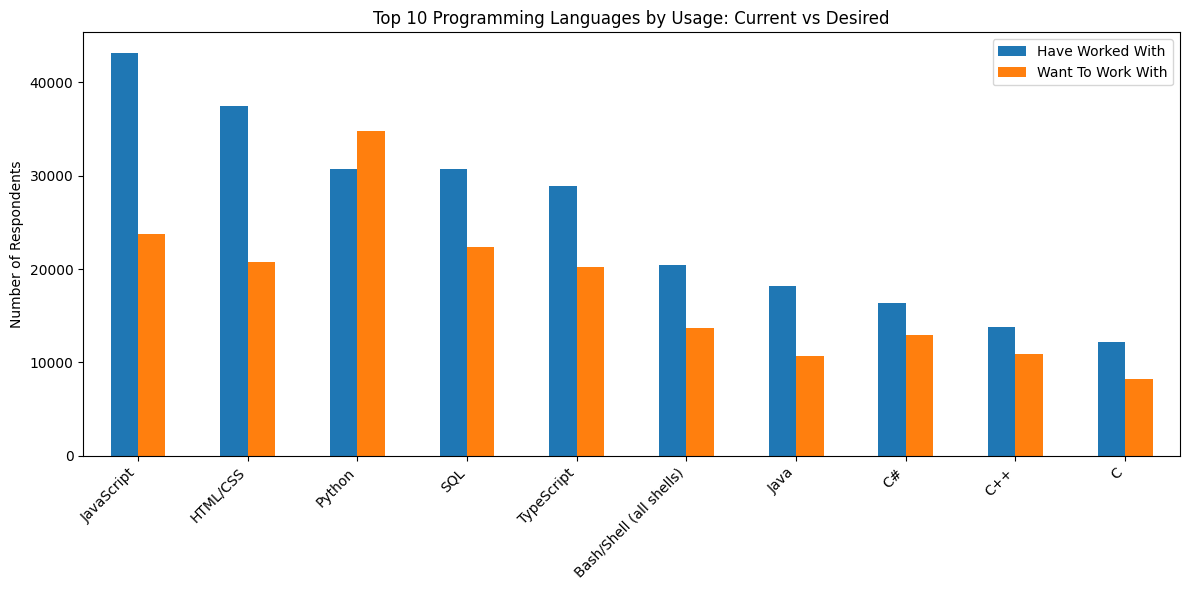

In [23]:
comparison = pd.DataFrame({
    'Have Worked With': have_counts,
    'Want To Work With': want_counts
}).fillna(0)

comparison_sorted = comparison.sort_values(
    by='Have Worked With',
    ascending=False
)

comparison_sorted.head(10).plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title('Top 10 Programming Languages by Usage: Current vs Desired')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [24]:
remote_country = pd.crosstab(
    df['Country'],
    df['RemoteWork']
)

remote_country

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Country,,,
Afghanistan,33,13,10
Albania,25,10,14
Algeria,47,8,22
Andorra,6,5,4
Angola,9,6,5
...,...,...,...
"Venezuela, Bolivarian Republic of...",20,9,40
Viet Nam,158,110,28
Yemen,9,5,4


In [32]:
top_countries = df['Country'].value_counts().head(10).index

remote_country_top = remote_country.loc[top_countries]

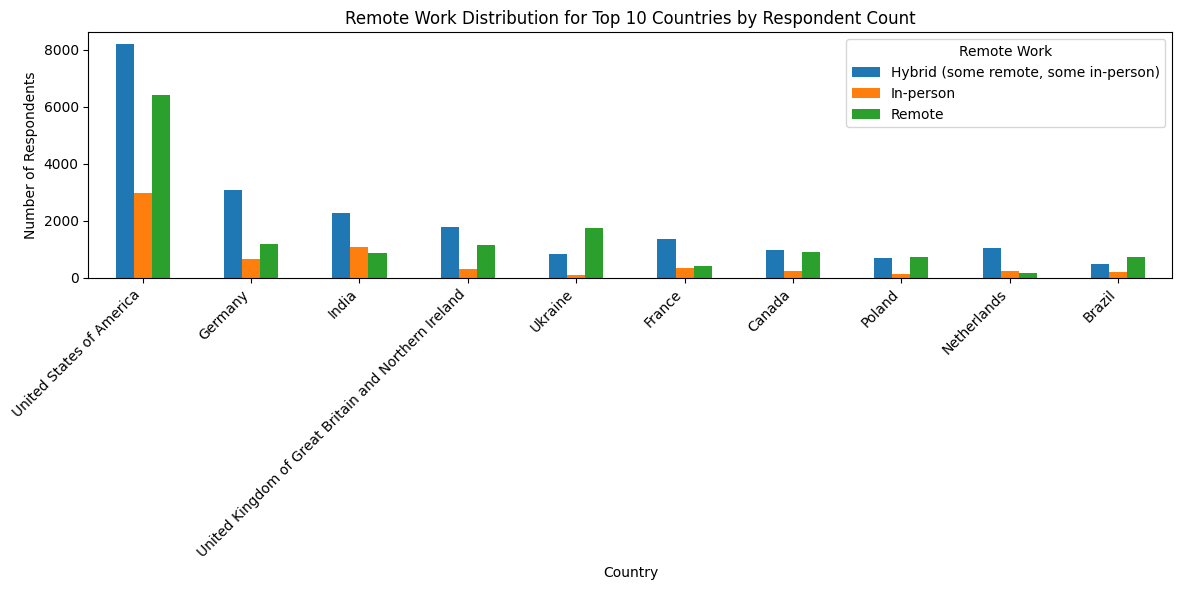

In [34]:
remote_country_top.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title('Remote Work Distribution for Top 10 Countries by Respondent Count')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [35]:
df_corr = df[['JobSat', 'YearsCodePro']].dropna()

spearman_corr = df_corr['JobSat'].corr(
    df_corr['YearsCodePro'],
    method='spearman'
)

spearman_corr

np.float64(0.15037624557716472)

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


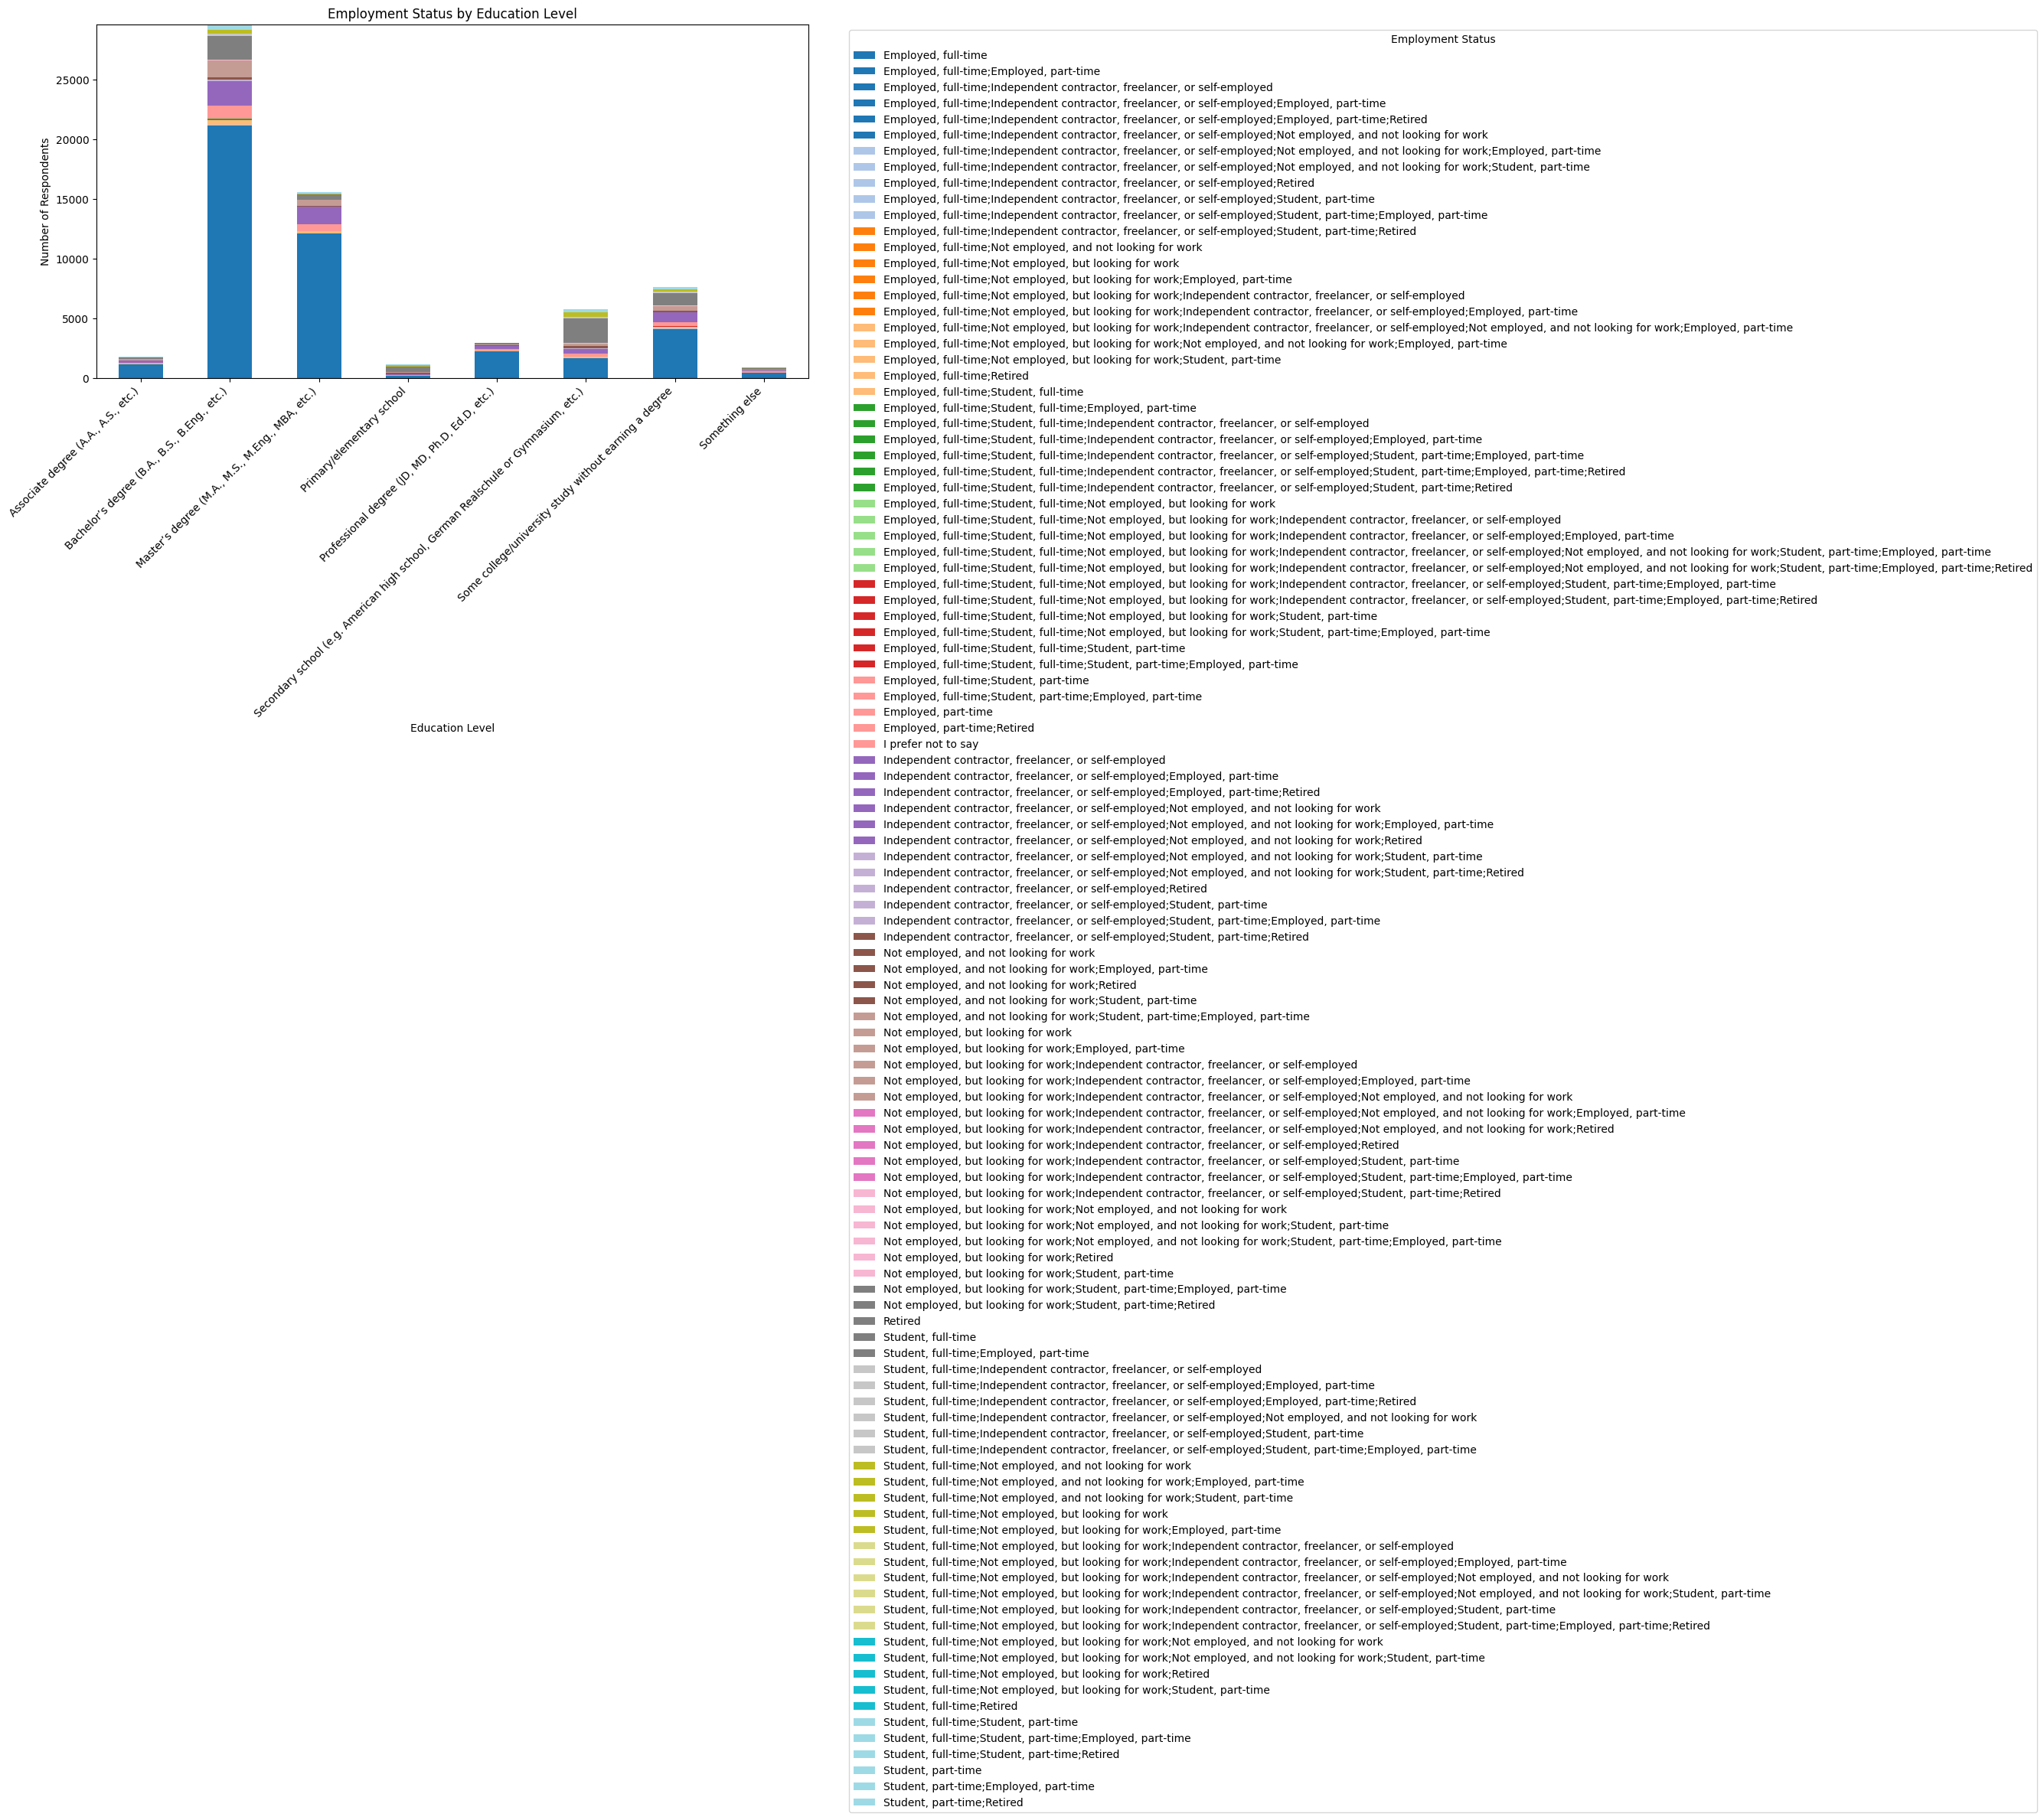

In [36]:
employment_edu = pd.crosstab(df['EdLevel'], df['Employment'])

employment_edu.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.title('Employment Status by Education Level')
plt.ylabel('Number of Respondents')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')

plt.legend(
    title='Employment Status',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [37]:
df.to_csv("survey_cleaned.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
